<a href="https://colab.research.google.com/github/carnival77/Machine_Learning/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Input points**



*  plot a set of points {(x(i),y(i))} that are loaded from 'data.csv' file (in black color)



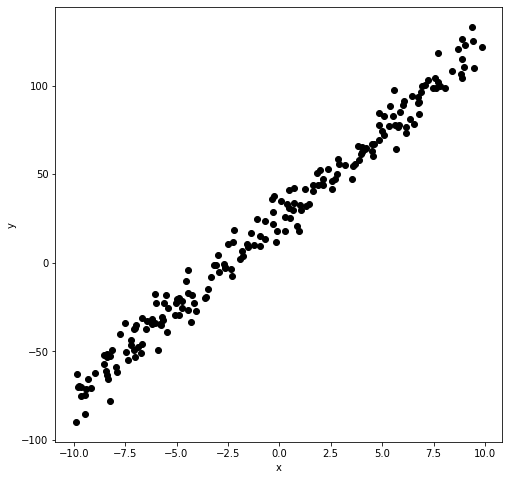

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import csv

path = "/content/drive/My Drive/Colab Notebooks/data.csv"
data = np.genfromtxt(path,delimiter=',')

xi_data = data[:,0]
yi_data = data[:,1]

plt.figure(figsize=(8,8))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xi_data,yi_data,color="black",label="data points")
plt.show()

#**2.Linear regression result**


*   plot a set of points {(x(i),y(i))} that are loaded from 'data.csv' file (in black color)



In [0]:
xi_data = data[:,0]
yi_data = data[:,1]

* plot a straight line obtained by the optimal linear regression based on the given set of points (in red color)


1. getting optimal solution by linear regression

(1) Linear Model

W (theta_1) = 1.0

b (theta_0) = 0.0

hypothesis = W*x + b = hθ​(x)=θ0​+θ1​x

In [0]:
W = 1.0
b = 0.0

n_data = number of data

steps = 1000 번의 학습 사이클. 

learning_rate = 0.03

In [0]:
n_data = len(xi_data)
steps = 5000
learning_rate = 0.01

(2) Objective Function

OF = objective function
 = J(θ)=2m1​∑i=1m​(hθ​(x(i))−y(i))2

(3) Gradient Descent

gradient_W : 

θ1(t+1)​:=θ1(t)​−αm1​∑i=1m​(hθ​(x(i))−y(i))x(i)

gradient_b :

θ0(t+1)​:=θ0(t)​−αm1​∑i=1m​(hθ​(x(i))−y(i))


In [58]:
for i in range(steps):
  hypothesis = W*xi_data + b
  OF = np.sum((hypothesis - yi_data)**2)/(2*n_data)
  gradient_W = np.sum((hypothesis - yi_data)*xi_data)/n_data
  gradient_b = np.sum((hypothesis - yi_data))/n_data
  
  W -= learning_rate*gradient_W
  b -= learning_rate*gradient_b

print(OF,W,b)

27.46750672590456 9.934635539221354 24.907393293947834


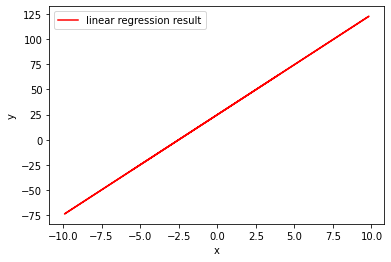

In [64]:
y = [W*x + b for x in xi_data]
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xi_data,y,color="red",label="linear regression result")
plt.legend()
plt.show()



*   the estimated straight line (linear function) is superimposed on the set of points



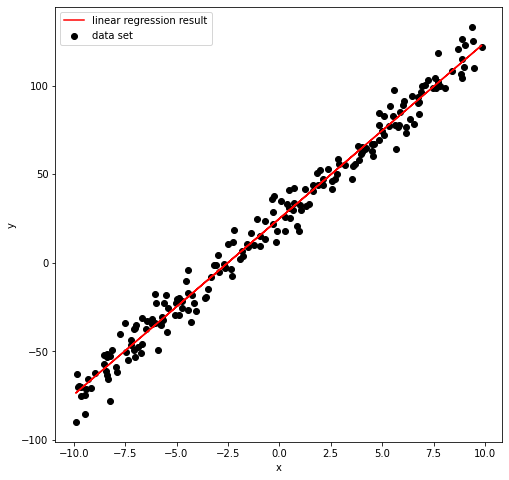

In [65]:
plt.figure(figsize=(8,8))
plt.scatter(xi_data,yi_data,color="black",label="data set")

y = [W*x + b for x in xi_data]
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xi_data,y,color="red",label="linear regression result")
plt.legend()
plt.show()

#**3. Plot the energy surface**



*   plot the energy surface (θ0,θ1,J(θ0,θ1)) with the range of variables θ0=[−30:0.1:30] and θ1=[−30:0.1:30]



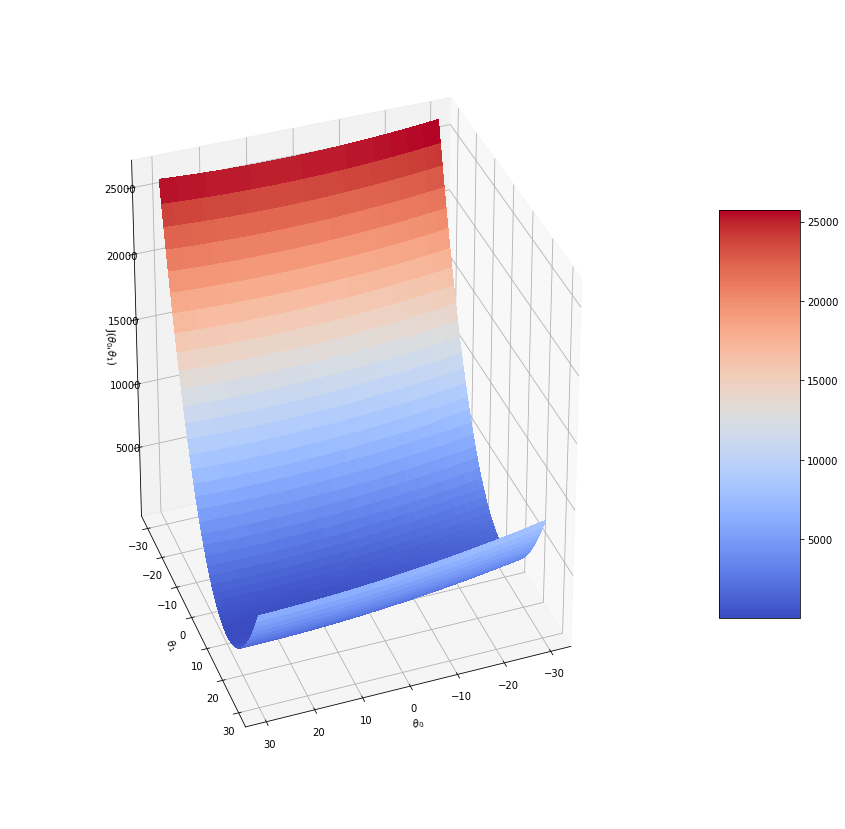

In [74]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter


X=xi_data
y=yi_data

theta_0 = theta_1 = np.arange(-30, 30, 0.1)

plt_theta_0, plt_theta_1 = np.meshgrid(theta_0, theta_1)

def calculate_mse(theta_0, theta_1):
    y_hat = theta_0 + theta_1 * X
    error = y_hat - y
    sse = np.sum(error ** 2)
    return ((1 / (2 * len(X))) * sse)

calculate_mse_v = np.vectorize(calculate_mse)
mse = calculate_mse_v(plt_theta_0, plt_theta_1).reshape(len(plt_theta_0), len(plt_theta_1))

fig = plt.figure(figsize=(15, 15))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(plt_theta_0,
                       plt_theta_1,
                       mse,
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
ax.set_xlabel(r'${\theta_0}$')
ax.set_ylabel(r'${\theta_1}$')
ax.set_zlabel(r'       J(${\theta_0}$,${\theta_1}$)')
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(elev=30,azim=70) 
ax.dist=11
plt.show()

#**4. Plot the gradient descent path on the energy surface**



*   plot the energy surface (θ0,θ1,J(θ0,θ1)) with the range of variables θ0=[−30:0.1:30] and θ1=[−30:0.1:30]



*   plot the energy value with the updated variables θ0(t) and θ1(t) at each gradient descent step on the energy surface


*   the initial condition is used by θ0(0)=−30 and θ1(0)=−30



*   the gradient descent is performed until the convergence is achieved

*   the gradient descent path is superimposed on the energy surface




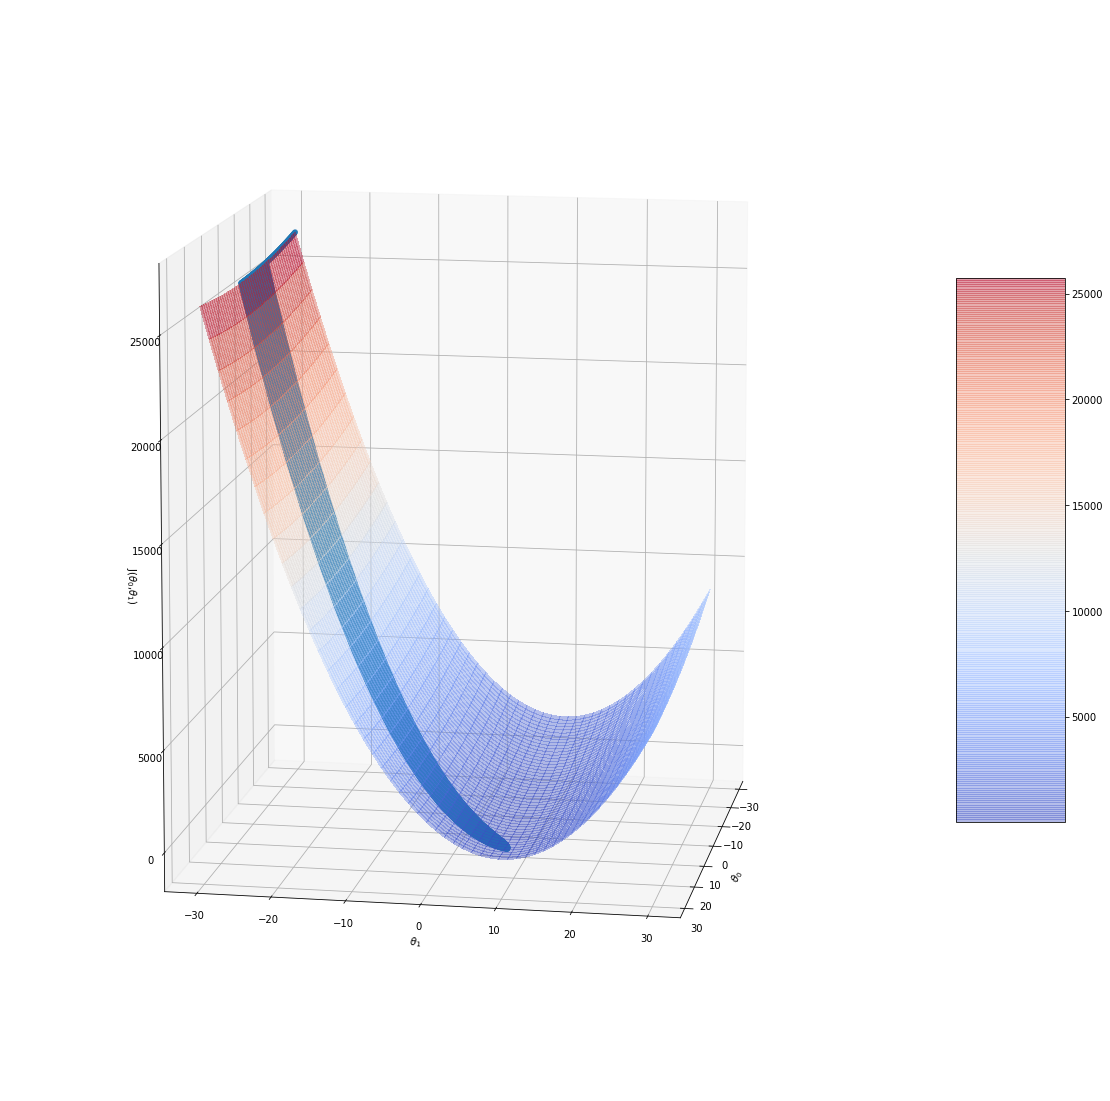

In [75]:
X=xi_data
y=yi_data

theta_0 = theta_1 = np.arange(-30, 30, 0.1)

theta_1_t=[]
theta_0_t=[]
ev_arr=[]

plt_theta_0, plt_theta_1 = np.meshgrid(theta_0, theta_1)

def calculate_mse(theta_0, theta_1):
    y_hat = theta_0 + theta_1 * X
    error = y_hat - y
    sse = np.sum(error ** 2)
    energy_value=((1 / (2 * len(X))) * sse)

    theta_1_t.append(theta_1)
    theta_0_t.append(theta_0)
    ev_arr.append(energy_value)

    gradient_theta_1 = np.sum(error*X)/len(X)
    gradient_theta_0 = np.sum(error)/len(X)

    theta_1 -= learning_rate*gradient_theta_1
    theta_0 -= learning_rate*gradient_theta_0
    
    return energy_value

calculate_mse_v = np.vectorize(calculate_mse)
mse = calculate_mse_v(plt_theta_0, plt_theta_1).reshape(len(plt_theta_0), len(plt_theta_1))

cv_theta_1=[]
cv_theta_0=[]
cv_ev=[]

minimum = ev_arr[0]
for i in range(360001):
  if ev_arr[i] <= minimum:
    minimum = ev_arr[i]
    cv_ev.append(ev_arr[i])
    cv_theta_1.append(theta_1_t[i])
    cv_theta_0.append(theta_0_t[i])

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(plt_theta_0,
                       plt_theta_1,
                       mse,
                       cmap=cm.coolwarm,
                       zorder=1,
                       alpha=0.4,
                       linewidth=0,
                       antialiased=False)

ax.scatter(cv_theta_0,cv_theta_1,cv_ev,zorder=10)

ax.set_xlabel(r'${\theta_0}$')
ax.set_ylabel(r'${\theta_1}$')
ax.set_zlabel(r'J(${\theta_0}$,${\theta_1}$)')
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(elev=10,azim=10)
ax.dist=10
plt.show()